In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('LoanDataset.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
dataset.shape

(614, 13)

# Estudiamos los campos de nuestro dataset. 

### 1. Campos Booleanos

In [136]:
def get_percent(field):
    values = dataset[field].value_counts(dropna=False)
    total = sum(values)
    sns.countplot(x=field, data=dataset, palette='hls', order=dataset[field].value_counts().index)
    plt.show
    
    print('Porcentaje {}: {:.2f}%'.format(values.keys()[0], values.values[0]/total*100))
    print('Porcentaje {}: {:.2f}%'.format(values.keys()[1], values.values[1]/total*100))
    if len(values)>2:
        print('Porcentaje {}: {:.2f}%'.format(values.keys()[2],values.values[2]/total*100))
    

#### 1. Gender


In [17]:
dataset["Gender"].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

Porcentaje Male: 79.64%
Porcentaje Female: 18.24%
Porcentaje nan: 2.12%


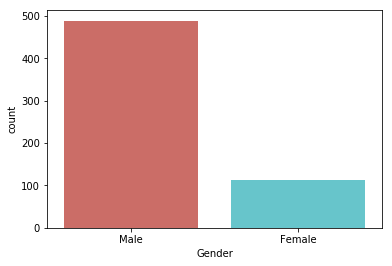

In [137]:
get_percent("Gender")

#### 2. Estado Civil (Married)

In [56]:
dataset["Married"].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

Porcentaje Yes: 64.82%
Porcentaje No: 34.69%
Porcentaje nan: 0.49%


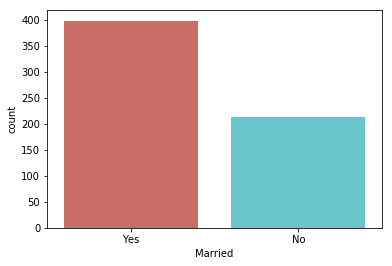

In [138]:
get_percent("Married")

#### 3. Education

In [99]:
dataset["Education"].value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Porcentaje Graduate: 78.18%
Porcentaje Not Graduate: 21.82%


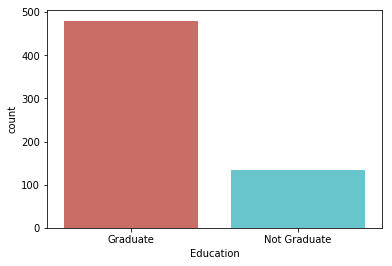

In [131]:
get_percent("Education")

#### 4. Credit_History

In [133]:
dataset["Credit_History"].value_counts(dropna=False)

 1.0    475
 0.0     89
NaN      50
Name: Credit_History, dtype: int64

Porcentaje 1.0: 77.36%
Porcentaje 0.0: 14.50%
Porcentaje NaN: 8.14%


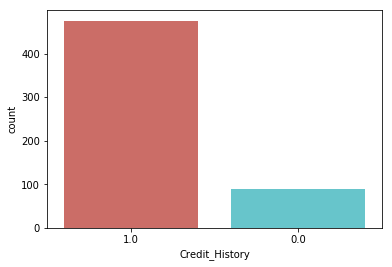

In [132]:
get_percent("Credit_History")

#### 5. Property_Area


In [134]:
dataset["Property_Area"].value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Porcentaje Semiurban: 37.95%
Porcentaje Urban: 32.90%
Porcentaje Rural: 29.15%


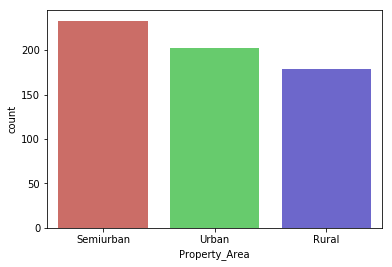

In [139]:
get_percent("Property_Area")

#### 6. Loan_Status
El Loan Status indica si se concede o no el préstamo. Para nuestro estudio, será lo que tratamos de predecir

In [140]:
dataset["Loan_Status"].value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

Porcentaje Y: 68.73%
Porcentaje N: 31.27%


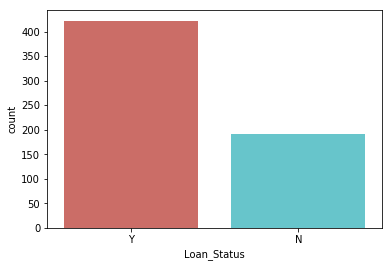

In [141]:
get_percent("Loan_Status")

#### 7. Loan_Ammount_Term:
    Es el tiempo (en días) que se da para devolver el préstamo.

In [167]:
dataset["Loan_Amount_Term"].value_counts(dropna=False)

 360.0    512
 180.0     44
 480.0     15
NaN        14
 300.0     13
 84.0       4
 240.0      4
 120.0      3
 36.0       2
 60.0       2
 12.0       1
Name: Loan_Amount_Term, dtype: int64

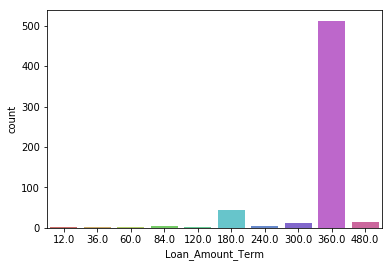

In [146]:
sns.countplot(x="Loan_Amount_Term", data=dataset, palette='hls')

In [147]:
val = dataset["Loan_Amount_Term"].value_counts(dropna=False)

In [161]:
print("Porcentaje de prestamos a 360 días: {:.2f}%".format(val[val.index[0]]/val.sum()*100))
print("Porcentaje de prestamos a 180 días: {:.2f}%".format(val[val.index[1]]/val.sum()*100))

Porcentaje de prestamos a 360 días: 83.39%
Porcentaje de prestamos a 180 días: 7.17%


### 2. Campos numéricos

In [162]:
dataset[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


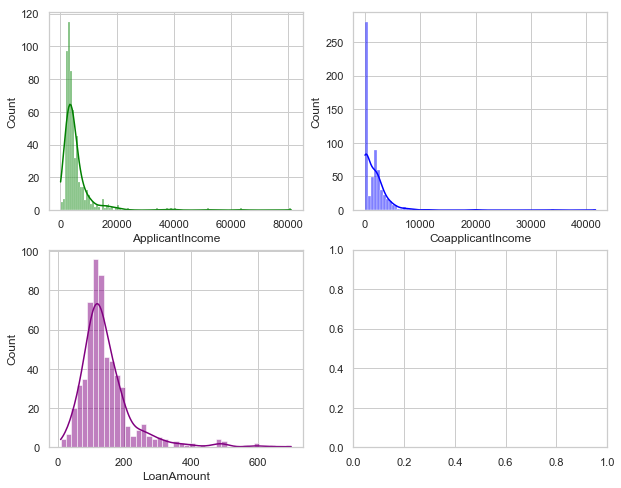

In [9]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(2, 2, figsize=(10,8))

sns.histplot(data=dataset, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=dataset, x="CoapplicantIncome", kde=True, ax=axs[0,1], color='blue')
sns.histplot(data=dataset, x="LoanAmount", kde=True, ax=axs[1,0], color="purple")

### 3. Correlación
Vamos a explorar las relaciones entre features para ver si hay relaciones de proporcionalidad entre ellos

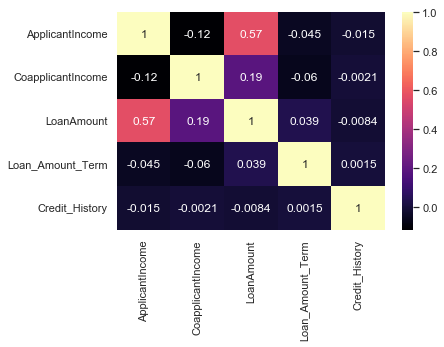

In [19]:
sns.heatmap(dataset.corr(), annot=True, cmap='magma')

Vemos que la cantidad del préstamo está relacionada con el ingreso del solicitante y, en menor medida, con el cosolicitante.

In [5]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
pd.pivot_table(dataset, columns="Property_Area")

Property_Area,Rural,Semiurban,Urban
ApplicantIncome,5554.083799,5292.261803,5398.247525
CoapplicantIncome,1645.536983,1520.133047,1716.350495
Credit_History,0.830303,0.861751,0.829670
LoanAmount,152.260116,145.504386,142.198953
Loan_Amount_Term,345.531429,347.113043,332.800000
